### Edge detection by Sobel operator

In [22]:
!pip install opencv-python matplotlib

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [25]:
img = cv2.imread('/home/hp/Documents/Daily_Task/Day_2/Assets/sudoku.jpg')

In [26]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [27]:
# Apply Sobel operator in x and y directions
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  # derivative in x
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  # derivative in y

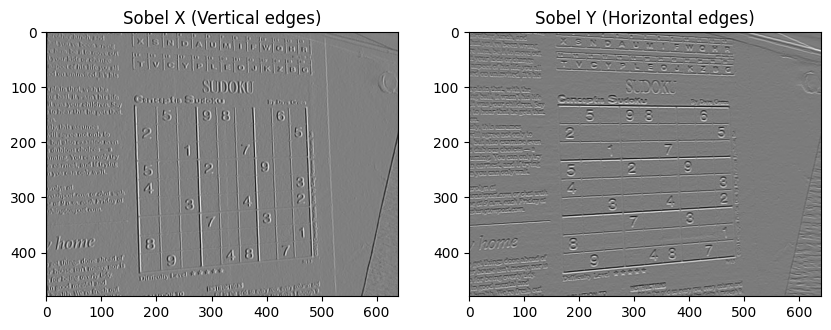

In [44]:
# Show both
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X (Vertical edges)')

plt.subplot(1,2,2)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y (Horizontal edges)')
plt.show()

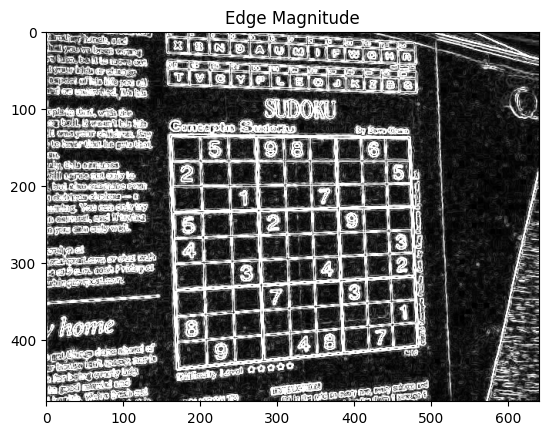

In [32]:
# Compute gradient magnitude
edge_magnitude = np.sqrt(sobelx**2 + sobely**2)
edge_magnitude = np.uint8(np.clip(edge_magnitude, 0, 255))

plt.imshow(edge_magnitude, cmap='gray')
plt.title("Edge Magnitude")
plt.show()

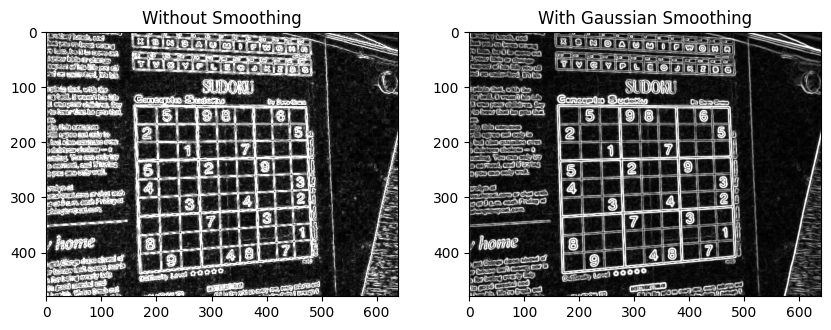

In [33]:
# Apply Gaussian blur before Sobel
blurred = cv2.GaussianBlur(gray, (5,5), 0)

sobelx_blur = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobely_blur = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

edge_magnitude_blur = np.sqrt(sobelx_blur**2 + sobely_blur**2)
edge_magnitude_blur = np.uint8(np.clip(edge_magnitude_blur, 0, 255))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(edge_magnitude, cmap='gray')
plt.title("Without Smoothing")

plt.subplot(1,2,2)
plt.imshow(edge_magnitude_blur, cmap='gray')
plt.title("With Gaussian Smoothing")
plt.show()


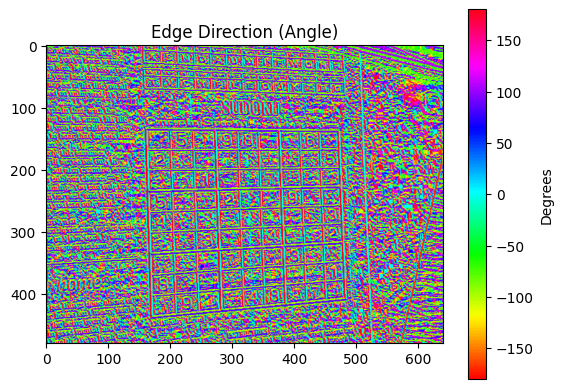

In [34]:
# Compute edge direction in degrees
angle = np.arctan2(sobely, sobelx) * (180 / np.pi)

plt.imshow(angle, cmap='hsv')  # use color map to show direction
plt.title("Edge Direction (Angle)")
plt.colorbar(label='Degrees')
plt.show()


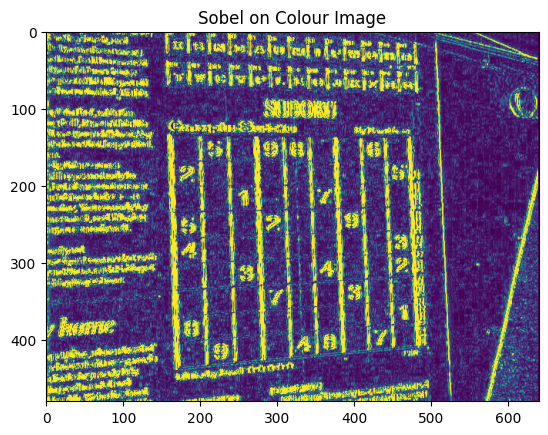

In [45]:
# Split into B, G, R channels
b, g, r = cv2.split(img)

# Apply Sobel on each channel
sobel_b = cv2.Sobel(b, cv2.CV_64F, 1, 0, ksize=3)
sobel_g = cv2.Sobel(g, cv2.CV_64F, 1, 0, ksize=3)
sobel_r = cv2.Sobel(r, cv2.CV_64F, 1, 0, ksize=3)

# Combine all channels' gradients (magnitude-wise)
sobel_color = np.sqrt(sobel_b**2 + sobel_g**2 + sobel_r**2)
sobel_color = np.uint8(np.clip(sobel_color, 0, 255))

plt.imshow(sobel_color)
plt.title("Sobel on Colour Image")
plt.show()

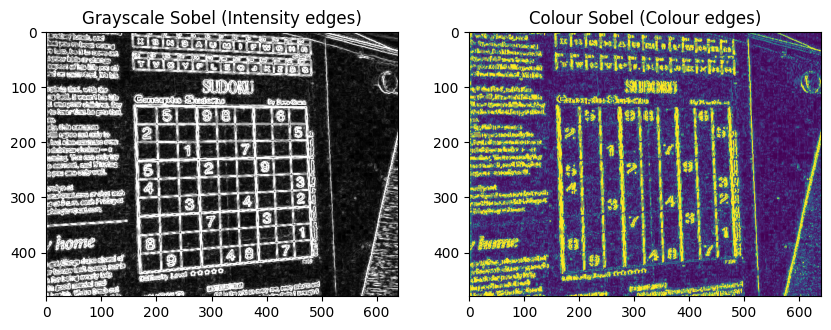

In [36]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(edge_magnitude, cmap='gray')
plt.title("Grayscale Sobel (Intensity edges)")

plt.subplot(1,2,2)
plt.imshow(sobel_color)
plt.title("Colour Sobel (Colour edges)")

plt.show()
